In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data_file = 'ex1data1.txt'
data_frame = np.genfromtxt(data_file, delimiter=',')

x_data = data_frame[:,[0]]
y_data = data_frame[:,[1]]

In [58]:
X = tf.placeholder("float", [None, 1])
Y = tf.placeholder("float", [None, 1])

W = tf.Variable(tf.random_uniform([1, 1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1, 1], -1.0, 1.0))

pred = tf.add(tf.matmul(X, W), b)
cost = tf.reduce_mean(tf.pow(pred - Y, 2))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

step:    0, current cost: 65.952827, W: [[1.5690147876739502]], b: [[ 0.44599023]]
step: 1000, current cost: 8.956352, W: [[1.1814736127853394]], b: [[-3.78071022]]
step: 2000, current cost: 8.953943, W: [[1.1927213668823242]], b: [[-3.89267278]]
step: 3000, current cost: 8.953941, W: [[1.19302499294281]], b: [[-3.89569521]]
step: 4000, current cost: 8.953942, W: [[1.1930303573608398]], b: [[-3.8957479]]
step: 5000, current cost: 8.953942, W: [[1.1930303573608398]], b: [[-3.8957479]]
step: 6000, current cost: 8.953942, W: [[1.1930303573608398]], b: [[-3.8957479]]
step: 7000, current cost: 8.953942, W: [[1.1930303573608398]], b: [[-3.8957479]]
step: 8000, current cost: 8.953942, W: [[1.1930303573608398]], b: [[-3.8957479]]
step: 9000, current cost: 8.953942, W: [[1.1930303573608398]], b: [[-3.8957479]]
training cost: 8.953942, W: [[1.1930303573608398]], b: [[-3.8957479]]


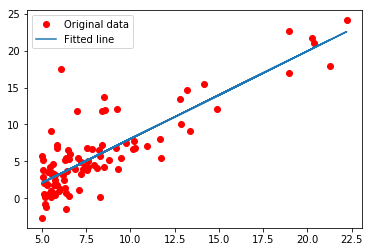

In [59]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for i in range(10000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})

    if i % 1000 == 0:    
        curr_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        print "step: {0:4d}, current cost: {1:.6f}, W: {2}, b: {3}".format(i, curr_cost, sess.run(W).tolist(), sess.run(b))

training_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data})
print "training cost: {0:.6f}, W: {1}, b: {2}".format(training_cost, sess.run(W).tolist(), sess.run(b))

plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [24]:
# https://www.cs.toronto.edu/~frossard/post/tensorflow/
from sklearn import preprocessing

data_file = 'ex1data2.txt'
data_frame = np.genfromtxt(data_file, delimiter=',')

scaled_data_frame = preprocessing.StandardScaler().fit_transform(data_frame)
x_data = scaled_data_frame[:,[0,1]]
y_data = scaled_data_frame[:,[2]]

In [25]:
X = tf.placeholder("float", [None, 2])
Y = tf.placeholder("float", [None, 1])

W = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1, 1], -1.0, 1.0))

pred = tf.add(tf.matmul(X, W), b)
cost = tf.reduce_mean(tf.pow(pred - Y, 2))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [26]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for i in range(10000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})

    if i % 1000 == 0:    
        curr_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        print "step: {0:4d}, current cost: {1:.6f}, W: {2}, b: {3}".format(i, curr_cost, sess.run(W).tolist(), sess.run(b))

training_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data})
print "training cost: {0:.6f}, W: {1}, b: {2}".format(training_cost, sess.run(W).tolist(), sess.run(b))

step:    0, current cost: 4.393575, W: [[-0.5814880728721619], [-0.8498401045799255]], b: [[-0.18370023]]
step: 1000, current cost: 0.267055, W: [[0.8847173452377319], [-0.05313027277588844]], b: [[ -1.47487516e-08]]
step: 2000, current cost: 0.267055, W: [[0.884763777256012], [-0.053177475929260254]], b: [[ -1.48790793e-08]]
step: 3000, current cost: 0.267055, W: [[0.884763777256012], [-0.053177475929260254]], b: [[ -1.49534571e-08]]
step: 4000, current cost: 0.267055, W: [[0.884763777256012], [-0.053177475929260254]], b: [[ -1.47670658e-08]]
step: 5000, current cost: 0.267055, W: [[0.884763777256012], [-0.053177475929260254]], b: [[ -1.48414454e-08]]
step: 6000, current cost: 0.267055, W: [[0.884763777256012], [-0.053177475929260254]], b: [[ -1.49158232e-08]]
step: 7000, current cost: 0.267055, W: [[0.884763777256012], [-0.053177475929260254]], b: [[ -1.49902029e-08]]
step: 8000, current cost: 0.267055, W: [[0.884763777256012], [-0.053177475929260254]], b: [[ -1.48038115e-08]]
step: 

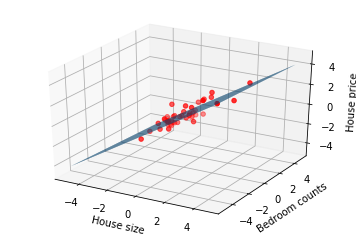

In [56]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca(projection='3d')


xs = scaled_data_frame[:,0]
ys = scaled_data_frame[:,1]
zs = scaled_data_frame[:,2]
ax.scatter(xs, ys, zs, c='r', marker='o')

d = sess.run(b)[0][0]
point = np.array([0, 0, -d])
normal = np.array([sess.run(W)[0][0], sess.run(W)[1][0], -1])
x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
z = (-normal[0] * x - normal[1] * y - d) / normal[2]
ax.plot_surface(x, y, z)

ax.set_xlabel('House size')
ax.set_ylabel('Bedroom counts')
ax.set_zlabel('House price')

plt.show()